## Workspace setup

In [1]:
from datetime import datetime  
import uproot
from functools import partial
import numpy as np
import tensorflow as tf
import importlib

2023-05-30 14:37:02.868619: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training dataset preparation

2023-05-30 14:44:56.779978: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-30 14:44:58.502250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


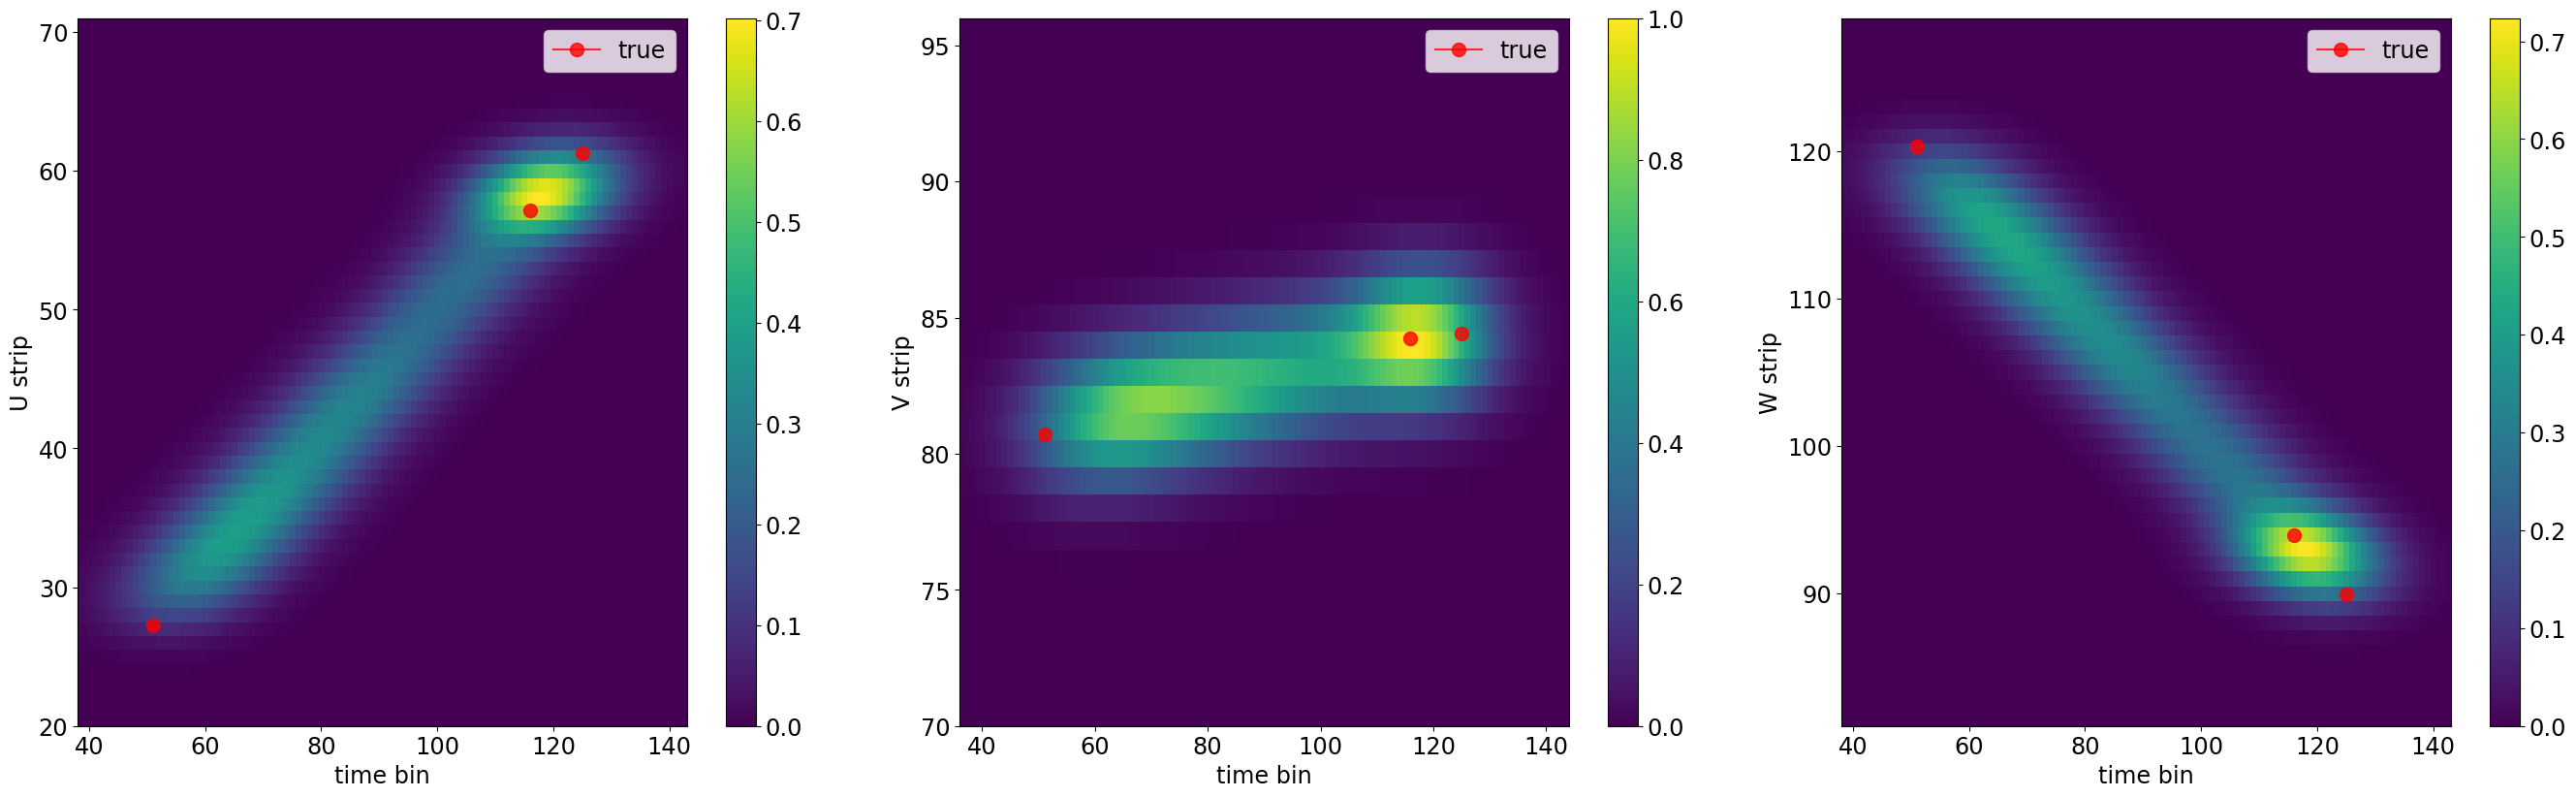

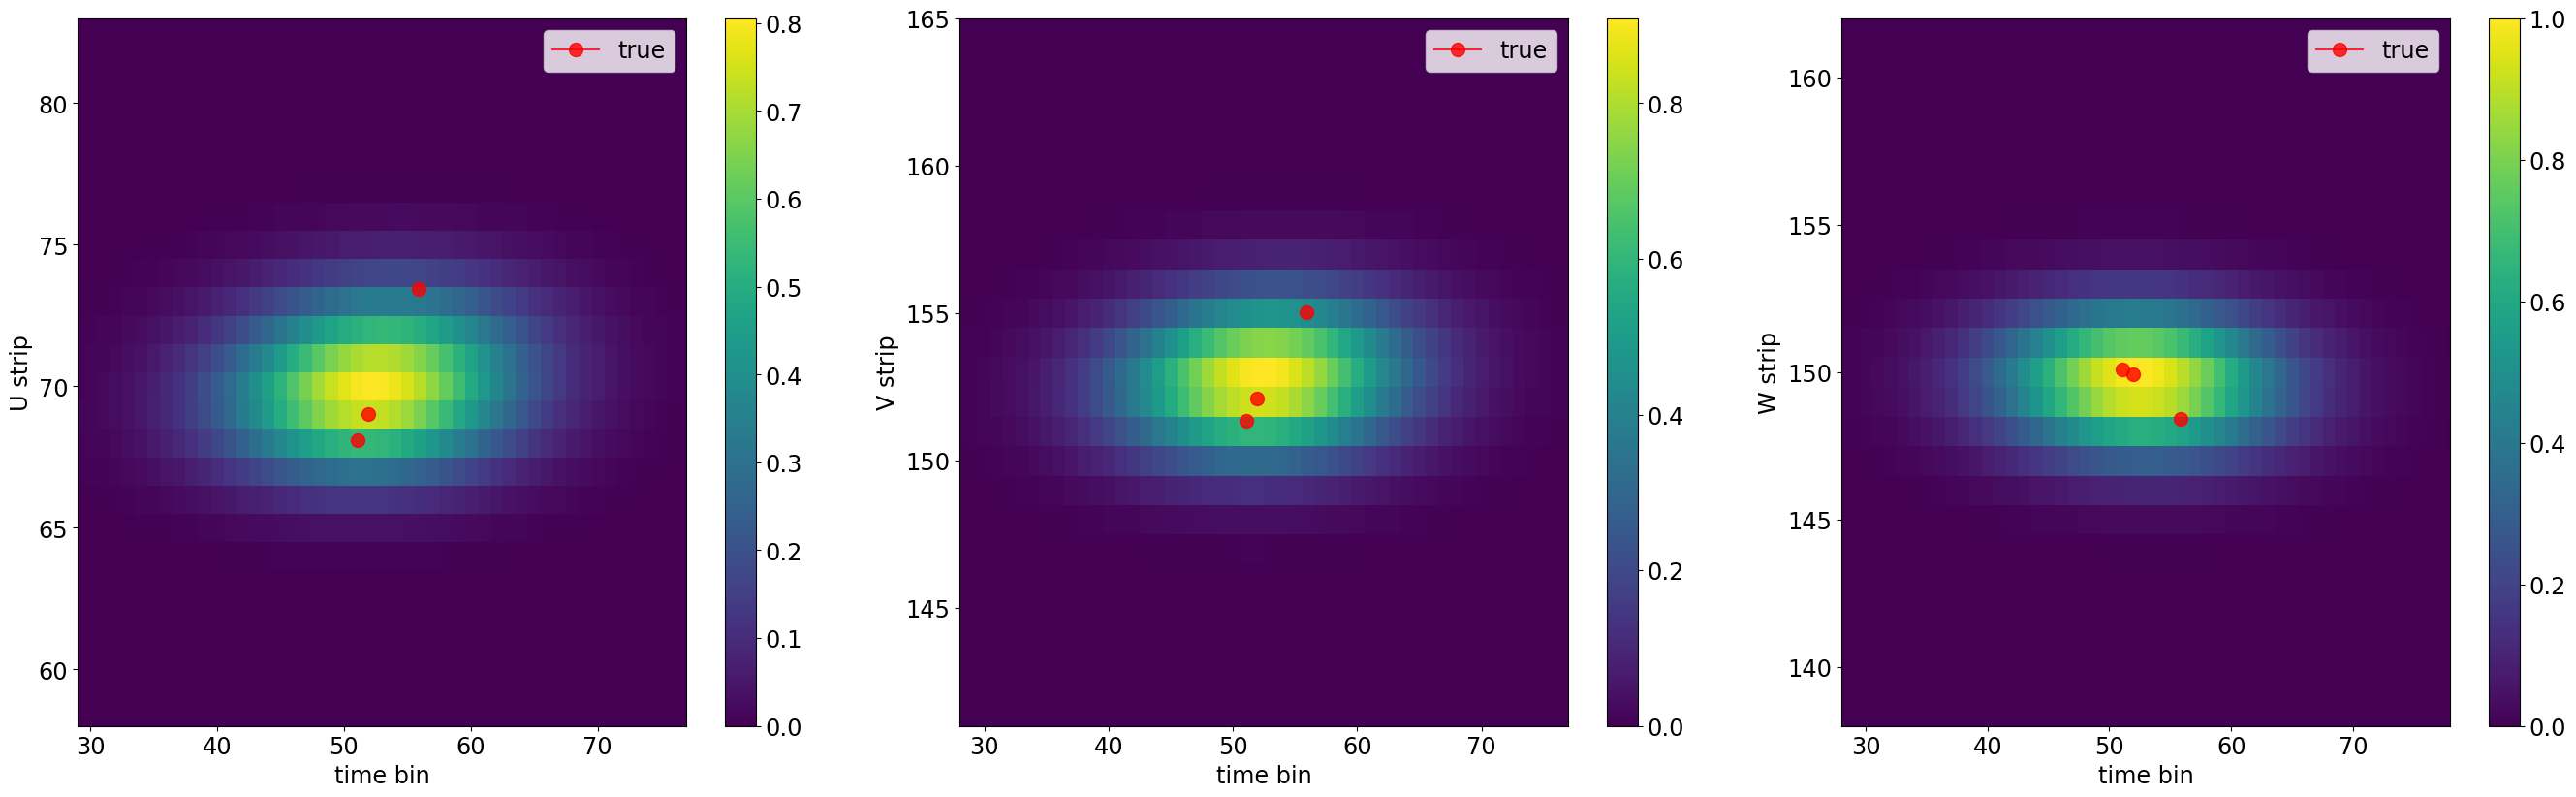

In [4]:
import io_functions as io
importlib.reload(io)

import plotting_functions as plf
importlib.reload(plf)

batchSize = 20
train_files = ['data/E_11_sigma_2/out_C_arr_1.root:TPCData',
               'data/E_11_sigma_2/out_C_arr_2.root:TPCData', 
               'data/E_11_sigma_2/out_C_arr_3.root:TPCData', 
               'data/E_11_sigma_2/out_C_arr_4.root:TPCData',
               'data/E_11_sigma_2/out_C_arr_5.root:TPCData',
               'data/E_11_sigma_2/out_C_arr_6.root:TPCData',
               'data/E_11_sigma_2/out_C_arr_7.root:TPCData',
              ]
datasetGenerator = partial(io.generator, files=train_files, batchSize=batchSize)

train_dataset = tf.data.Dataset.from_generator(
     datasetGenerator,
     output_signature=(
         tf.TensorSpec(shape=(batchSize,) + (io.projections.shape), dtype=tf.float32),
         tf.TensorSpec(shape=(batchSize,9), dtype=tf.float32)))

for aBatch in train_dataset.take(1):
    plf.plotEvent(aBatch, model=None)
    pass

test_files = ['data/E_11_sigma_2/out_C_arr_8.root:TPCData']
datasetGenerator = partial(io.generator, files=test_files, batchSize=batchSize)

test_dataset = tf.data.Dataset.from_generator(
     datasetGenerator,
     output_signature=(
         tf.TensorSpec(shape=(batchSize,) + (io.projections.shape), dtype=tf.float32),
         tf.TensorSpec(shape=(batchSize,9), dtype=tf.float32)))
 
for aBatch in test_dataset.take(1):
    plf.plotEvent(aBatch, model=None)
    pass

## Model definition

In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Resizing(height=128, width=128), 
  tf.keras.layers.Conv2D(16, 5, padding='same', activation='relu', 
                         data_format="channels_last"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 5, padding='same', activation='relu', 
                         data_format="channels_last"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 5, padding='same', activation='relu', 
                         data_format="channels_last"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(9)
])

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=5000,
                decay_rate=0.98,
                staircase=False)

optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule) 
model.compile(optimizer = optimizer, 
              loss = 'mse', 
              metrics=['mse']) 

## Model training

Epoch 1/10


2023-05-30 14:45:15.497563: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-05-30 14:45:15.497606: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2023-05-30 14:45:15.497653: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_tracer.cc:1679] Profiler found 1 GPUs
2023-05-30 14:45:15.575406: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2023-05-30 14:45:15.575627: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_tracer.cc:1813] CUPTI activity buffer flushed
2023-05-30 14:45:15.592668: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-30 14:45:16.811031: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] 

      9/Unknown - 4s 124ms/step - loss: 0.2029 - mse: 0.2029

2023-05-30 14:45:19.503447: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-05-30 14:45:19.503522: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


     21/Unknown - 6s 131ms/step - loss: 0.1461 - mse: 0.1461

2023-05-30 14:45:21.000717: I tensorflow/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2023-05-30 14:45:21.001873: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_tracer.cc:1813] CUPTI activity buffer flushed
2023-05-30 14:45:21.029599: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_collector.cc:541]  GpuTracer has collected 1757 callback api events and 1737 activity events. 
2023-05-30 14:45:21.037660: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


   7000/Unknown - 924s 132ms/step - loss: 0.0056 - mse: 0.0056

2023-05-30 15:00:39.950282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


7000/7000 [==============================] - 926s 132ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 8.3676e-04 - val_mse: 8.3676e-04
Epoch 2/10
7000/7000 [==============================] - 956s 137ms/step - loss: 8.4104e-04 - mse: 8.4104e-04 - val_loss: 5.3814e-04 - val_mse: 5.3814e-04
Epoch 3/10
7000/7000 [==============================] - 916s 131ms/step - loss: 5.4060e-04 - mse: 5.4060e-04 - val_loss: 4.2020e-04 - val_mse: 4.2020e-04
Epoch 4/10
7000/7000 [==============================] - 928s 133ms/step - loss: 4.1065e-04 - mse: 4.1065e-04 - val_loss: 3.0257e-04 - val_mse: 3.0257e-04
Epoch 5/10
7000/7000 [==============================] - 933s 133ms/step - loss: 3.3020e-04 - mse: 3.3020e-04 - val_loss: 2.5690e-04 - val_mse: 2.5690e-04
Epoch 6/10
7000/7000 [==============================] - 923s 132ms/step - loss: 2.7855e-04 - mse: 2.7855e-04 - val_loss: 2.0961e-04 - val_mse: 2.0961e-04
Epoch 7/10
7000/7000 [==============================] - 932s 133ms/step - loss: 2.4226e-04 - ms

INFO:tensorflow:Assets written to: training/{epochs:04d}_2023_May_30_17_20_37/assets


INFO:tensorflow:Assets written to: training/{epochs:04d}_2023_May_30_17_20_37/assets


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      1216      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        12832     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)       

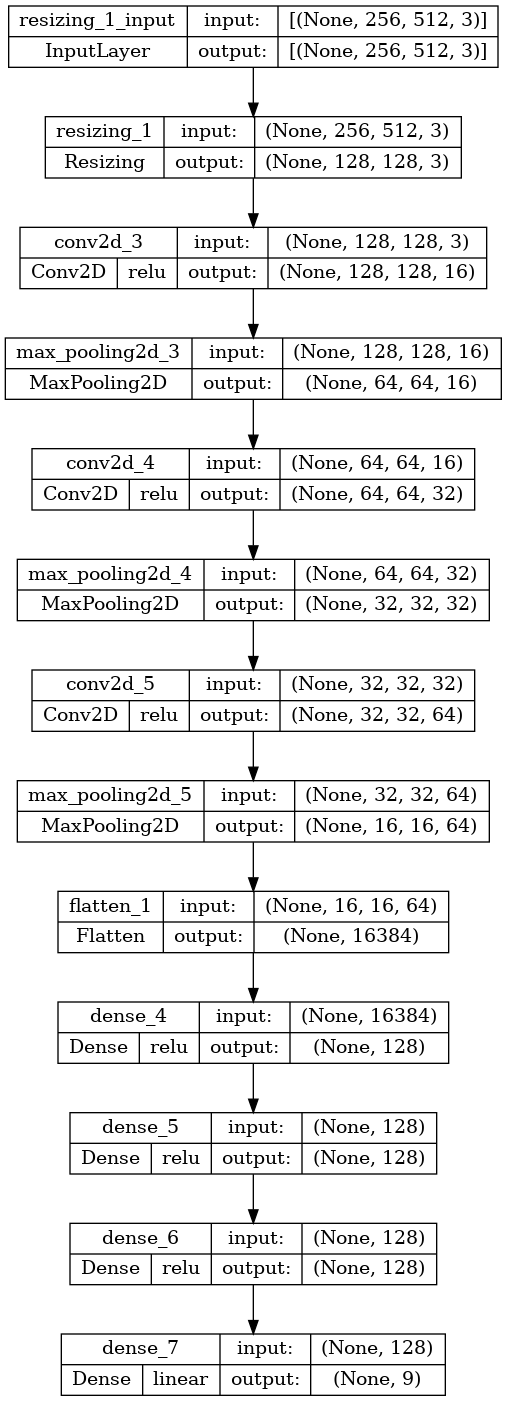

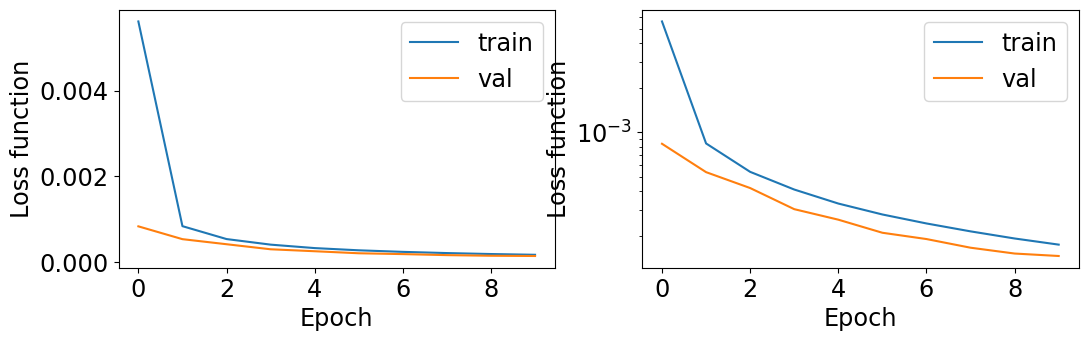

In [7]:
%%time

import plotting_functions as plf
importlib.reload(plf)

log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch=(10, 20))
early_stop_callback = tf.keras.callbacks.EarlyStopping(patience=5, verbose=1)
callbacks =  [tensorboard_callback]

epochs=50
history = model.fit(train_dataset, 
                    epochs=epochs,
                    verbose = 1,
                    workers = 3,
                    use_multiprocessing = True,
                    validation_data = test_dataset.take(10),
                    callbacks=callbacks
                    )
plf.plotTrainHistory(history)

current_time = datetime.now().strftime("%Y_%b_%d_%H_%M_%S")
print("Training start. Current Time =", current_time)

job_dir = "training/{epochs:04d}_"+current_time
model.save(job_dir, save_format='tf')

model.summary()
tf.keras.utils.plot_model(
    model, to_file="fig_png/model.png",
    show_shapes=True, show_dtype=False, show_layer_names=True,
    rankdir="TB", expand_nested=False,
    dpi=96, layer_range=None,
    show_layer_activations=True, show_trainable=False)

## Model performance on training data.

Fill Pandas DataFrame with true and response values.

2023-05-30 17:58:51.264269: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


CPU times: user 2min 17s, sys: 30.6 s, total: 2min 47s
Wall time: 2min 33s


,GEN_StartPosX,GEN_StartPosY,GEN_StartPosZ,GEN_StopPosX_Part1,GEN_StopPosY_Part1,GEN_StopPosZ_Part1,GEN_StopPosX_Part2,GEN_StopPosY_Part2,GEN_StopPosZ_Part2,RECO_StartPosX,RECO_StartPosY,RECO_StartPosZ,RECO_StopPosX_Part1,RECO_StopPosY_Part1,RECO_StopPosZ_Part1,RECO_StopPosX_Part2,RECO_StopPosY_Part2,RECO_StopPosZ_Part2
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.280925,-0.138562,-52.240620,-1.152404,0.038356,-52.127464,-0.198385,-0.169770,-52.266186,0.216985,-0.015857,-52.273239,-1.619322,-0.549584,-52.267414,-0.328958,-0.044603,-52.400467
std,57.539192,10.009161,18.580299,69.224594,35.699589,22.947239,57.748417,10.907412,21.910357,57.577492,9.887145,18.366697,69.657402,35.576077,22.749130,57.672913,10.768817,21.689342
min,-99.999596,-19.960903,-66.385445,-270.401794,-184.575974,-165.113373,-109.818939,-30.528181,-66.387596,-110.272514,-20.920237,-68.548935,-245.488495,-165.769821,-150.265091,-109.615372,-29.200357,-70.214279
25%,-49.474999,-8.259488,-63.703587,-52.709280,-20.860404,-66.387596,-49.782126,-8.514816,-66.387596,-49.531775,-8.064628,-63.589289,-53.636449,-21.199553,-66.460688,-49.928728,-8.316321,-66.430168
50%,0.856568,-0.213262,-60.476513,-0.767246,0.229270,-66.297386,0.650727,-0.195302,-66.387596,0.771612,-0.097795,-60.535833,-1.071936,-0.359433,-65.202957,0.444496,-0.123630,-65.593090
75%,49.682680,7.941508,-47.720428,50.774866,20.947572,-43.314122,49.059068,8.205561,-44.454586,49.544765,7.958626,-47.802222,50.573812,20.323287,-43.555943,48.913025,8.155973,-44.538757
max,99.948830,19.981714,50.313652,235.536667,230.612488,173.792557,109.783302,31.058699,61.529034,103.179840,22.050005,51.909958,227.043869,175.416168,139.152771,108.963516,32.268898,62.267971


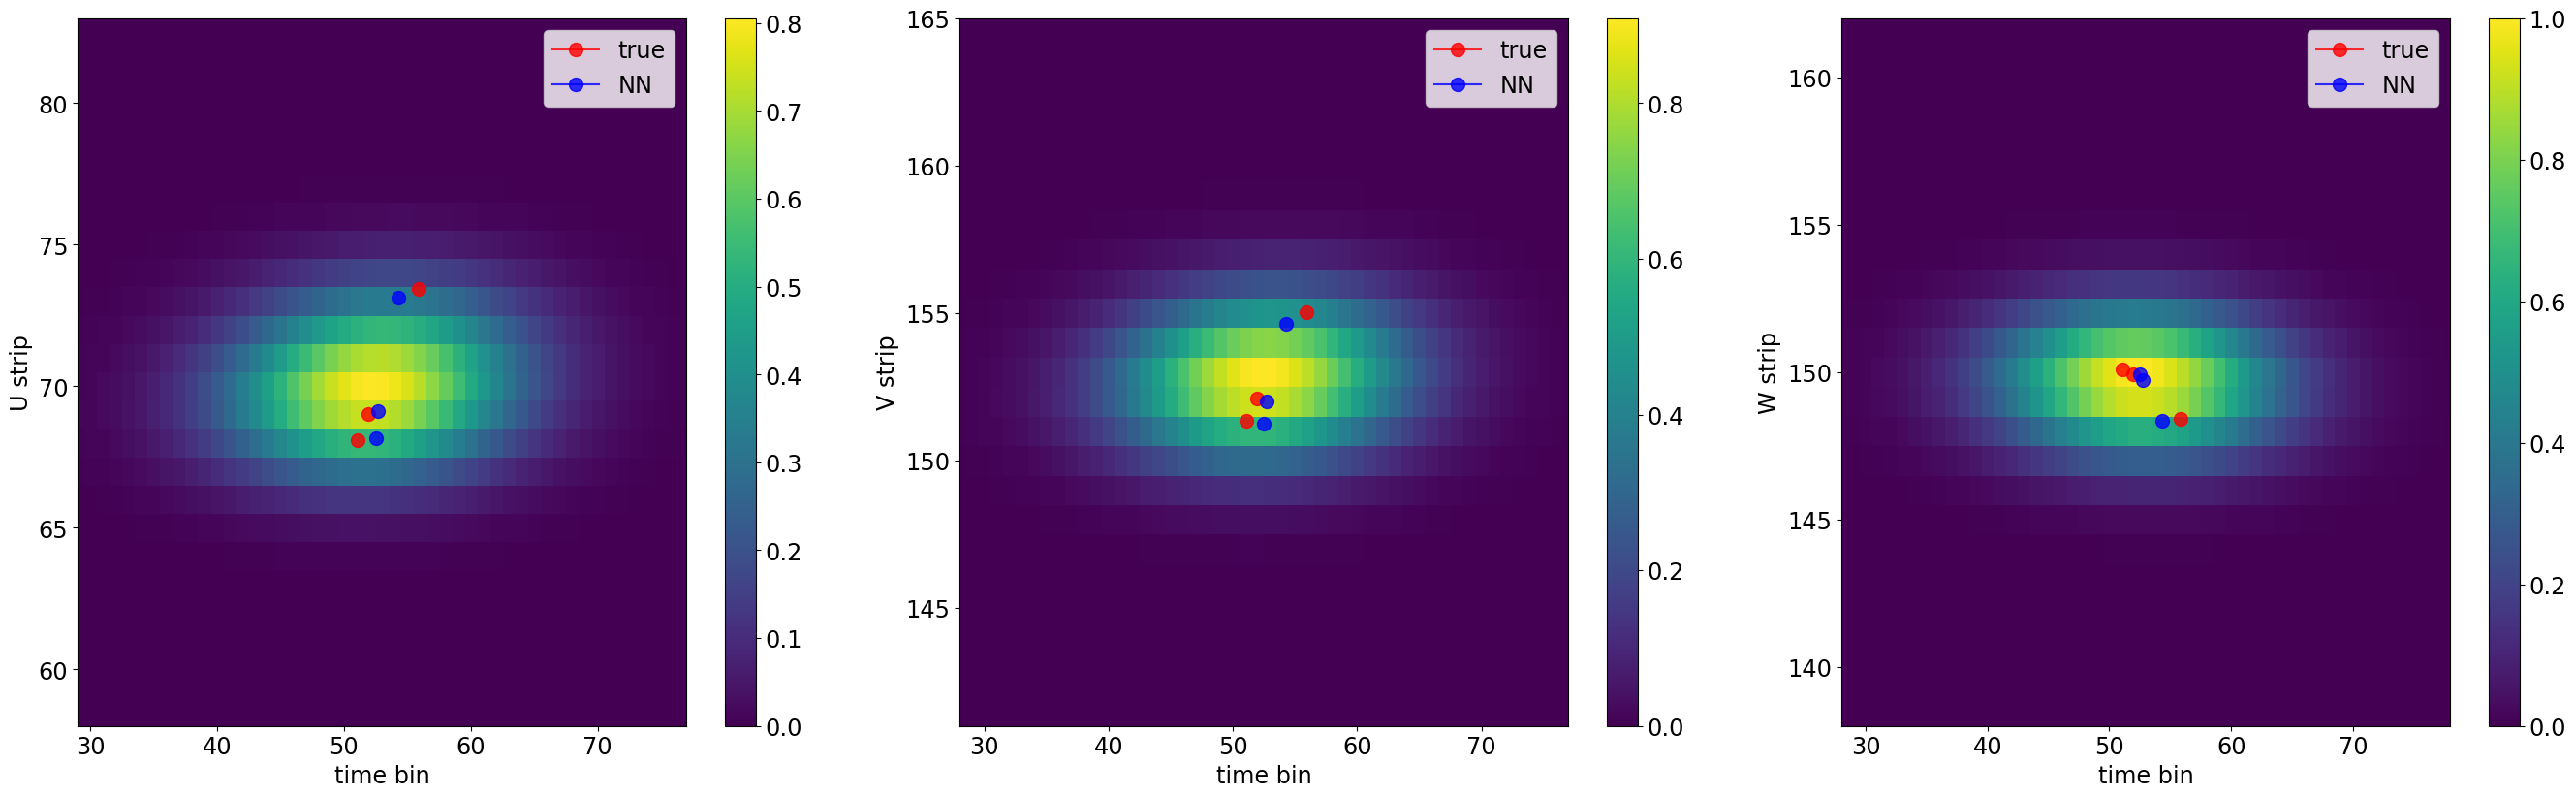

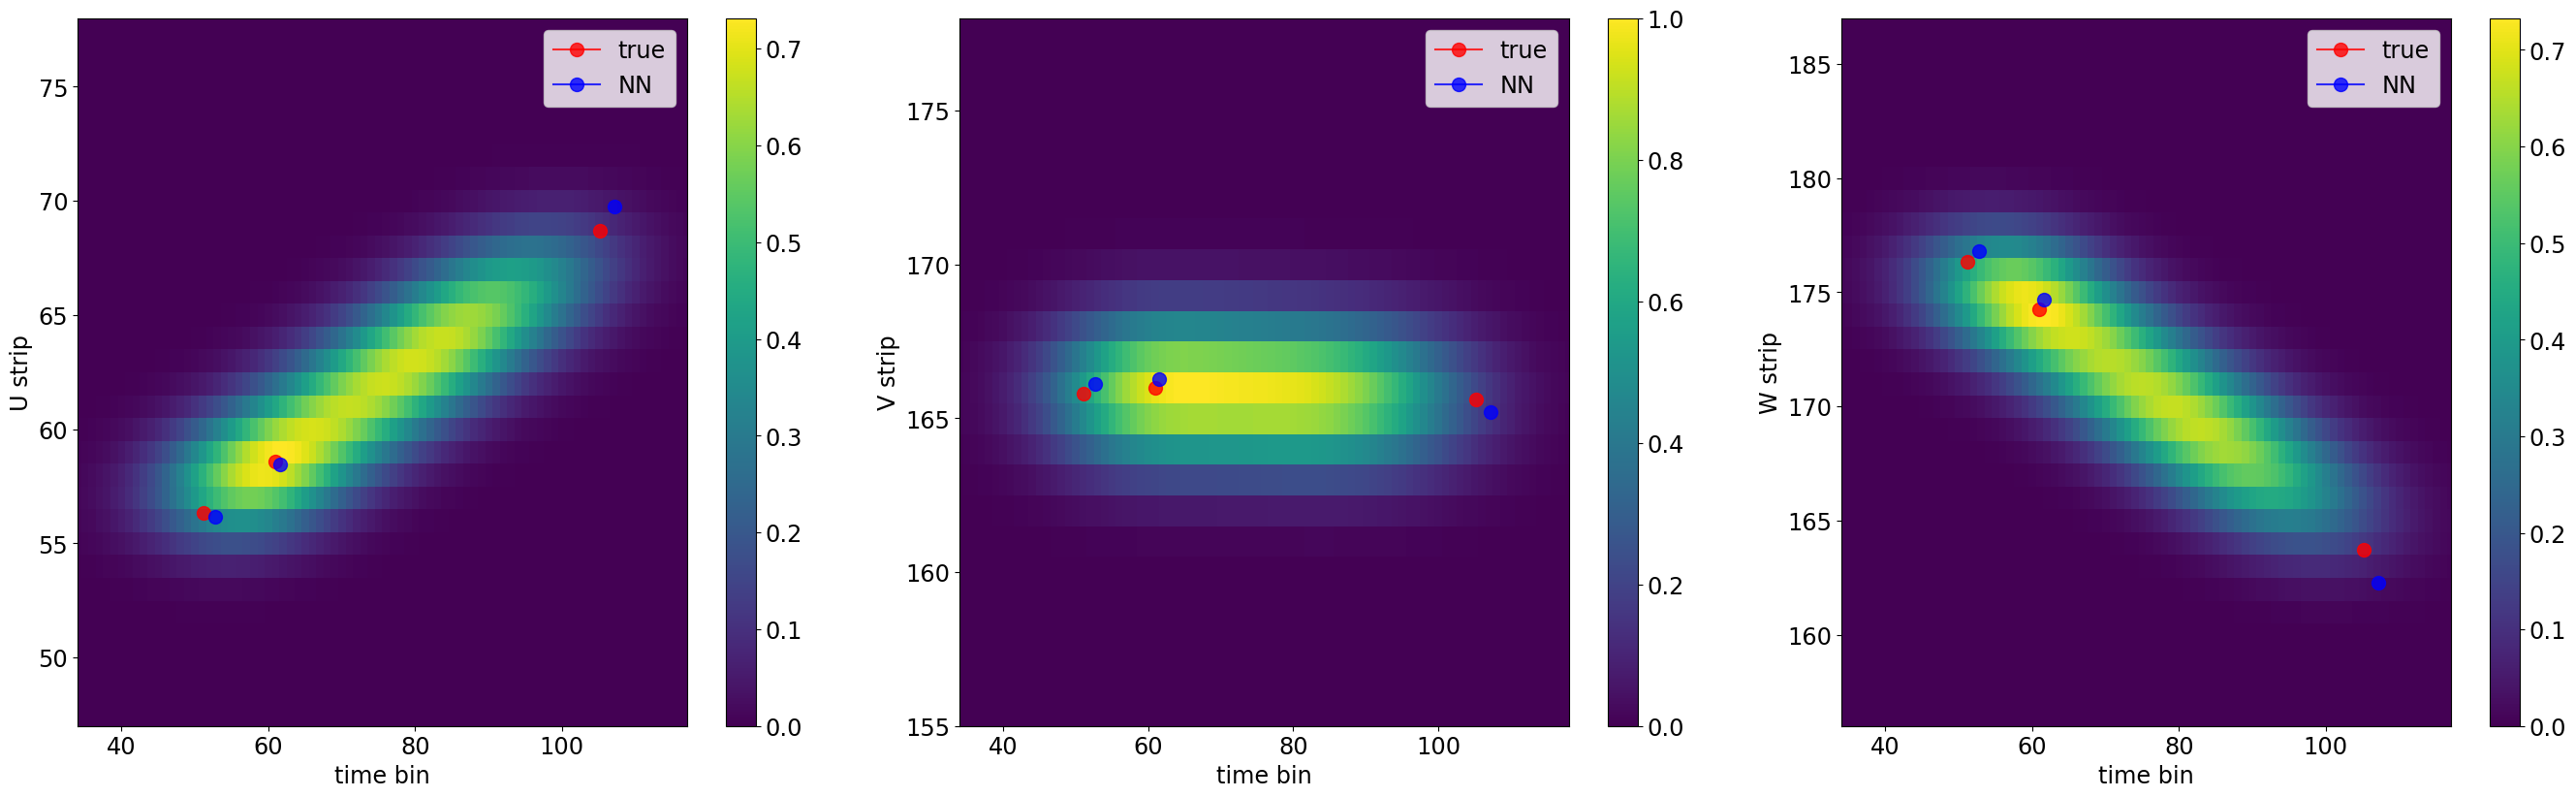

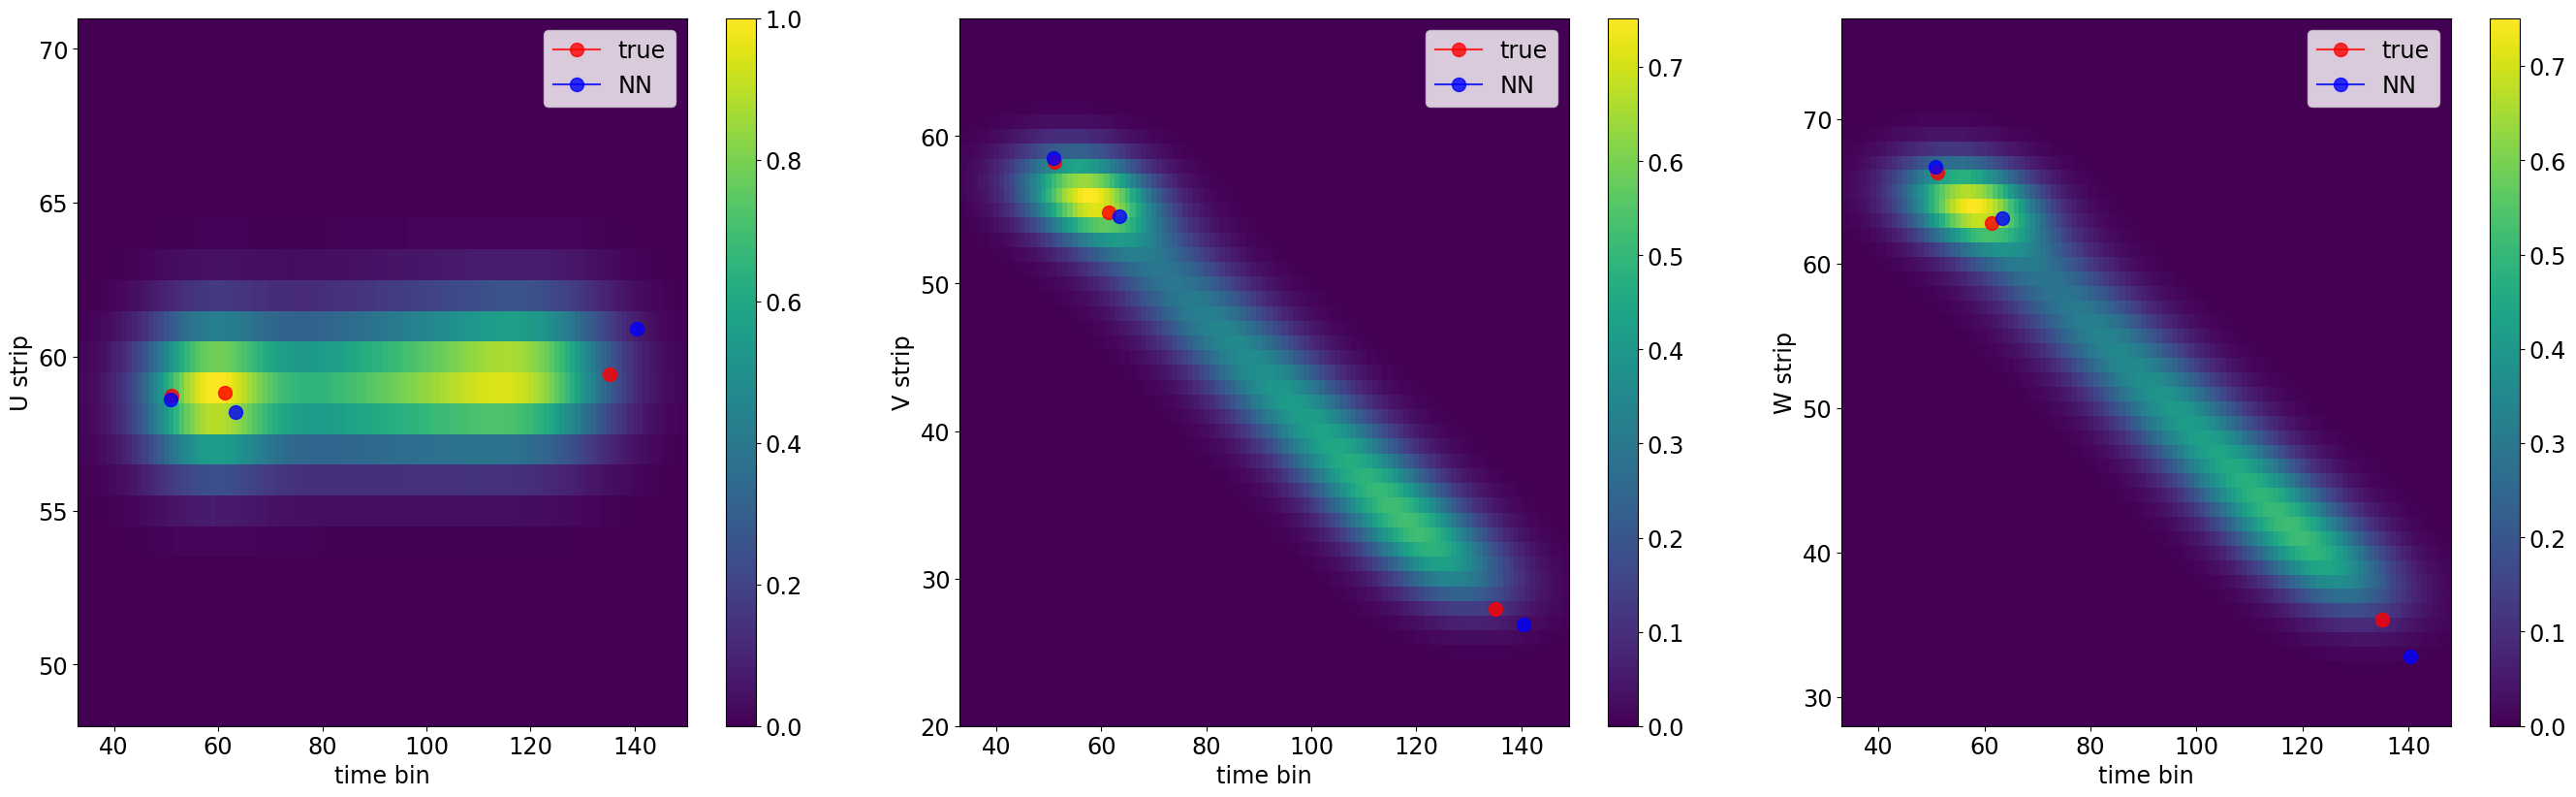

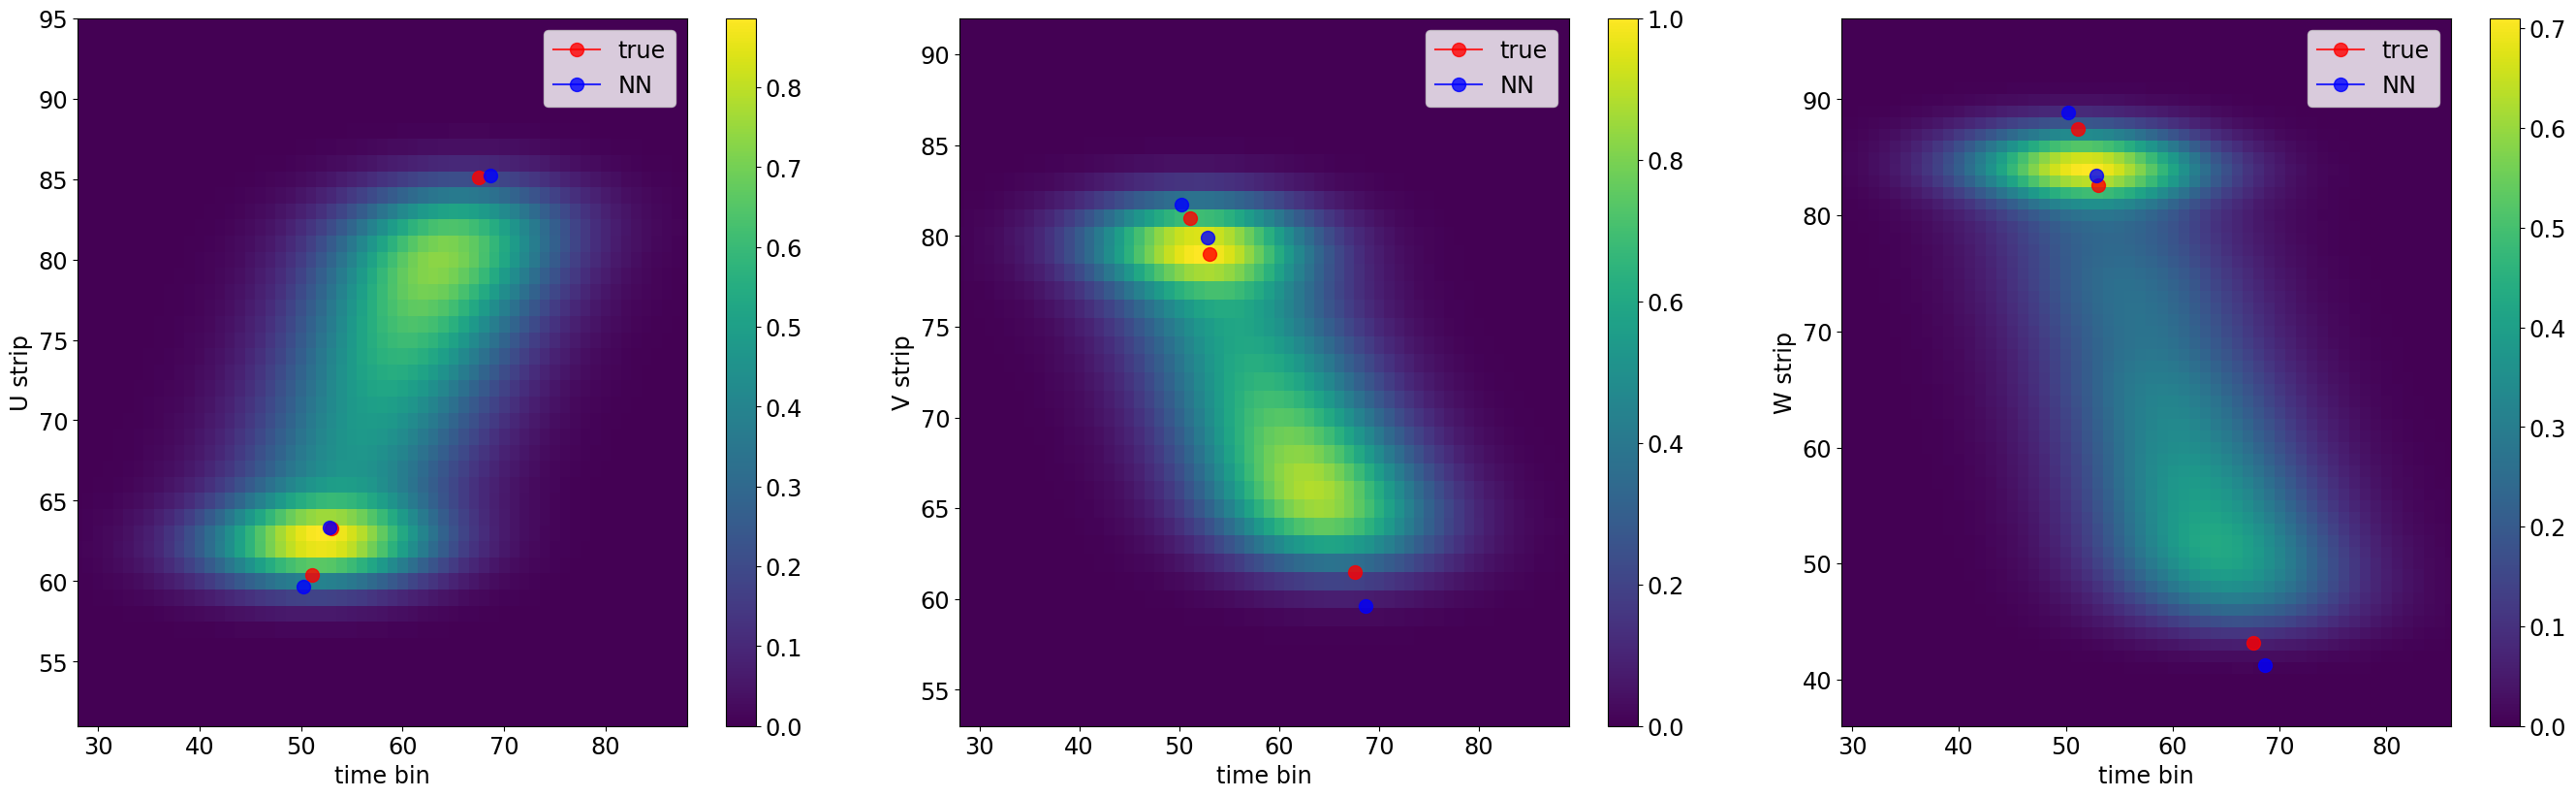

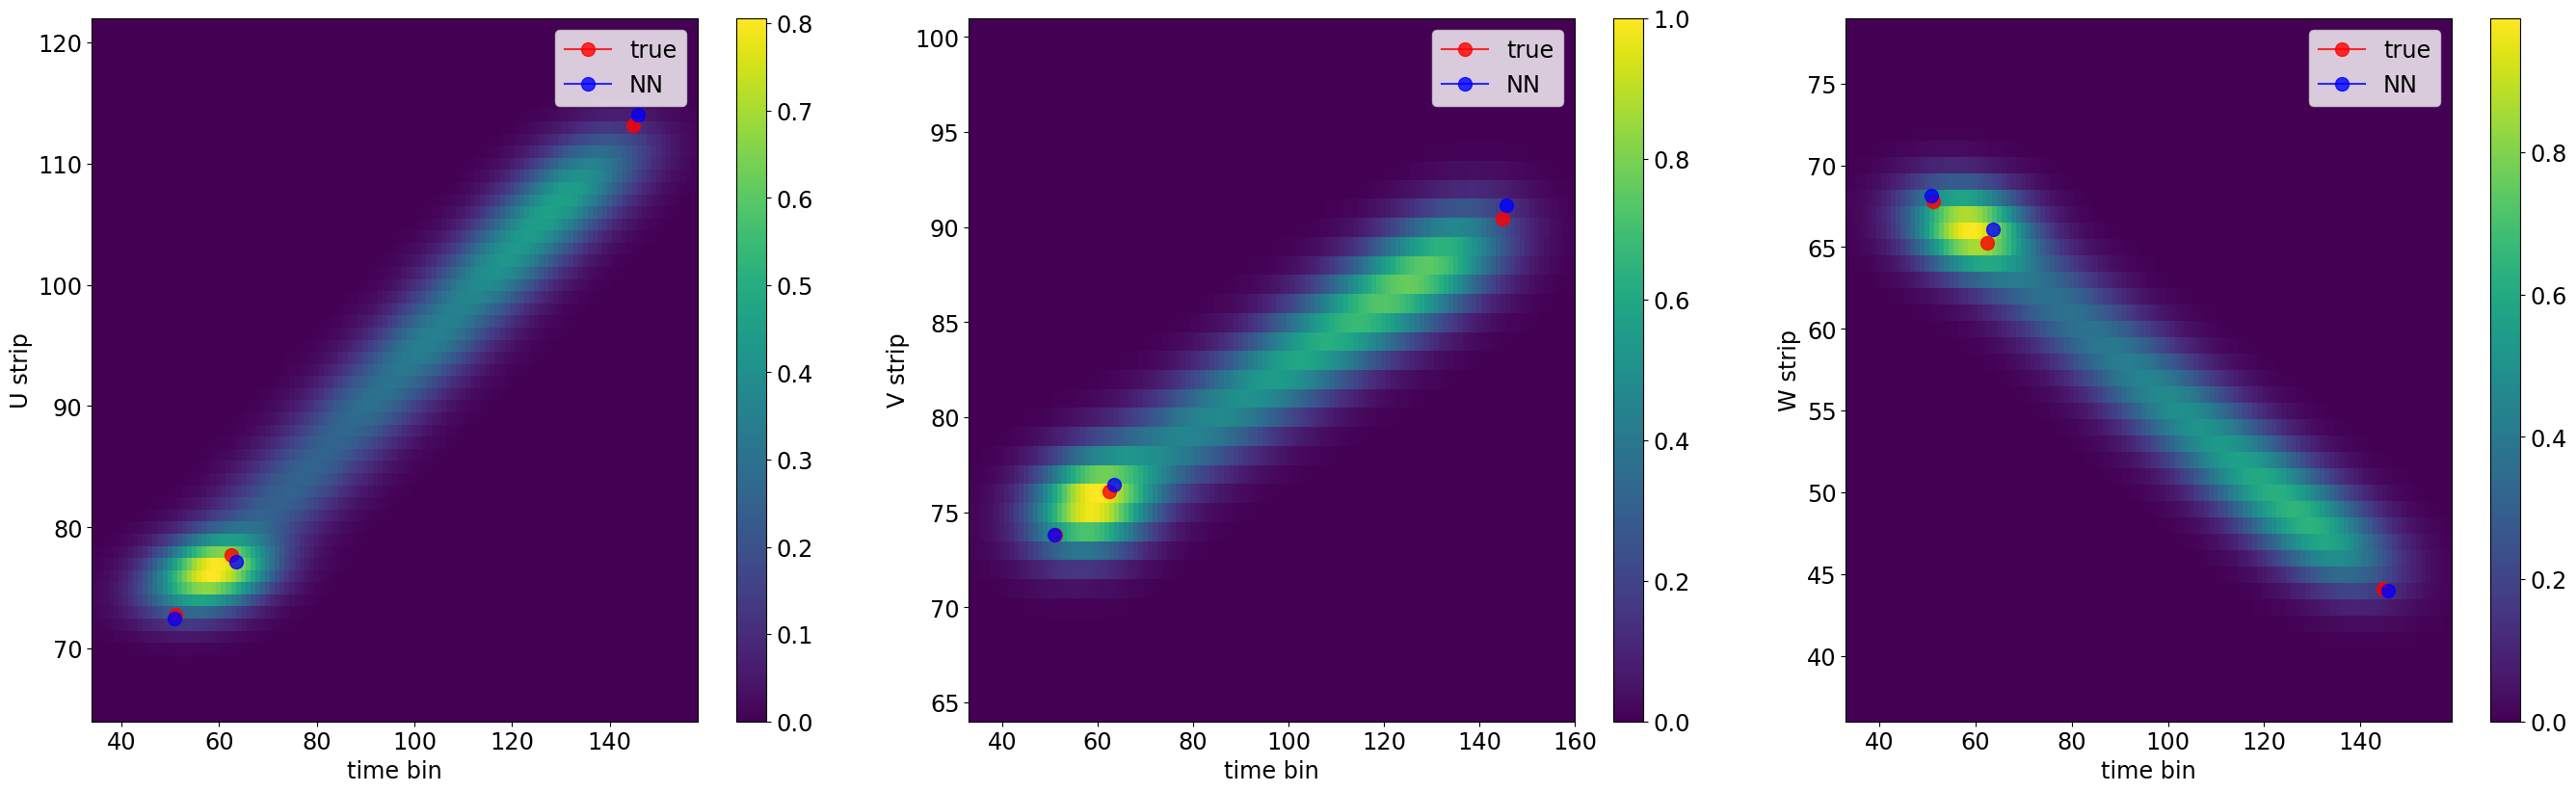

In [14]:
%%time
import utility_functions as utils
importlib.reload(utils)

#model_path = "./training/2023_Apr_28_16_58_32/"
#model_path = "/scratch_hdd/akalinow/ELITPC/PythonAnalysis/training/2023_May_02_23_51_30/"
#model = tf.keras.models.load_model(model_path)

df = utils.df

for aBatch in test_dataset: 
    df = utils.fillPandasDataset(aBatch, df, model)     
    
for aBatch in test_dataset.take(5):
    plf.plotEvent(aBatch, model=model)

df.describe()    

### Resolution plots

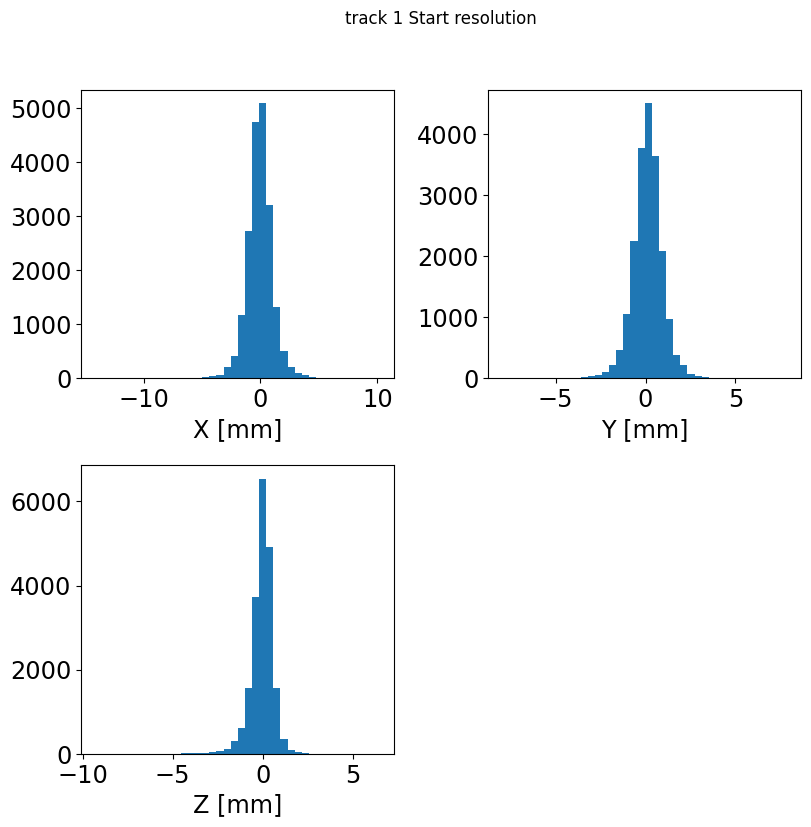

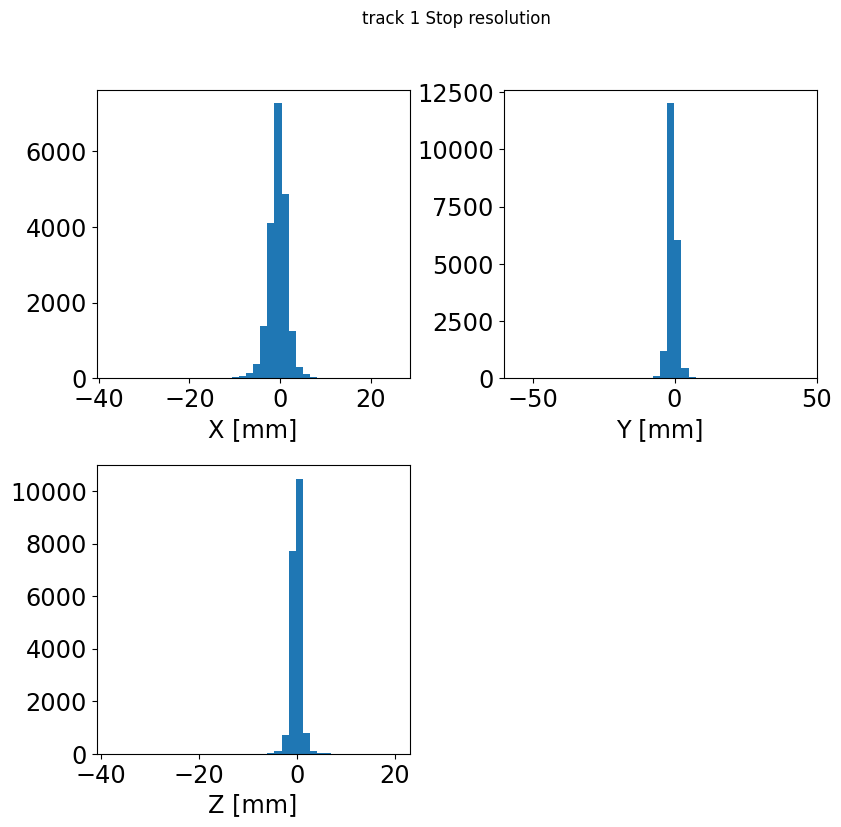

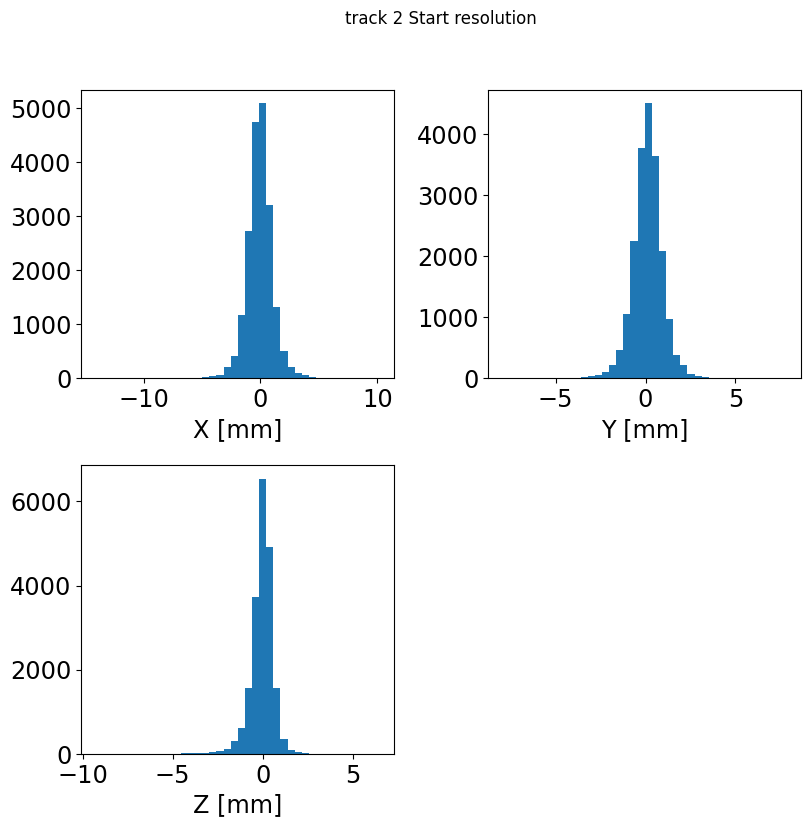

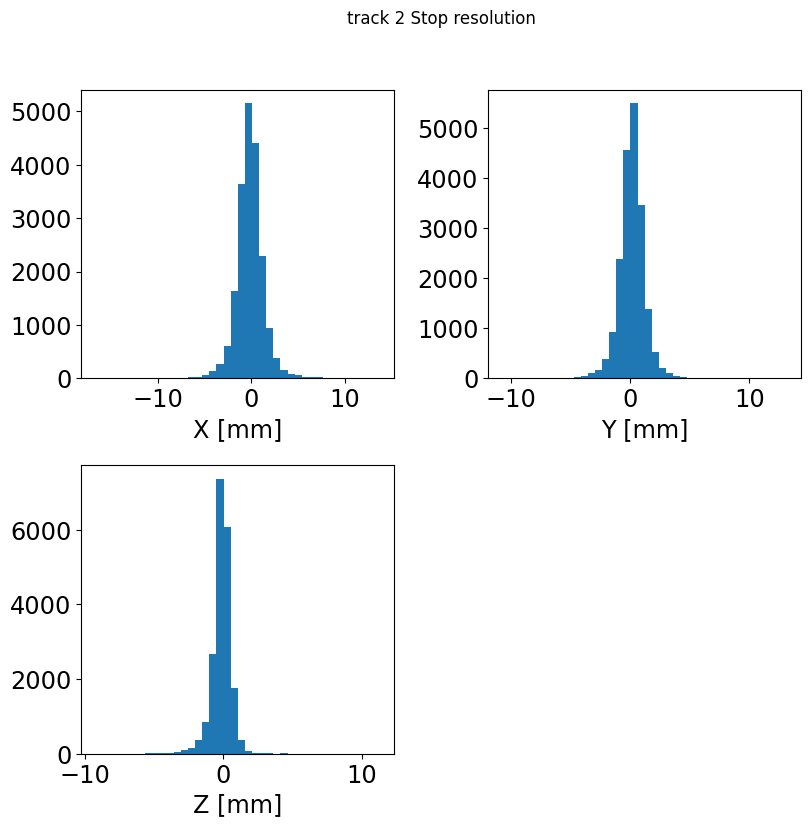

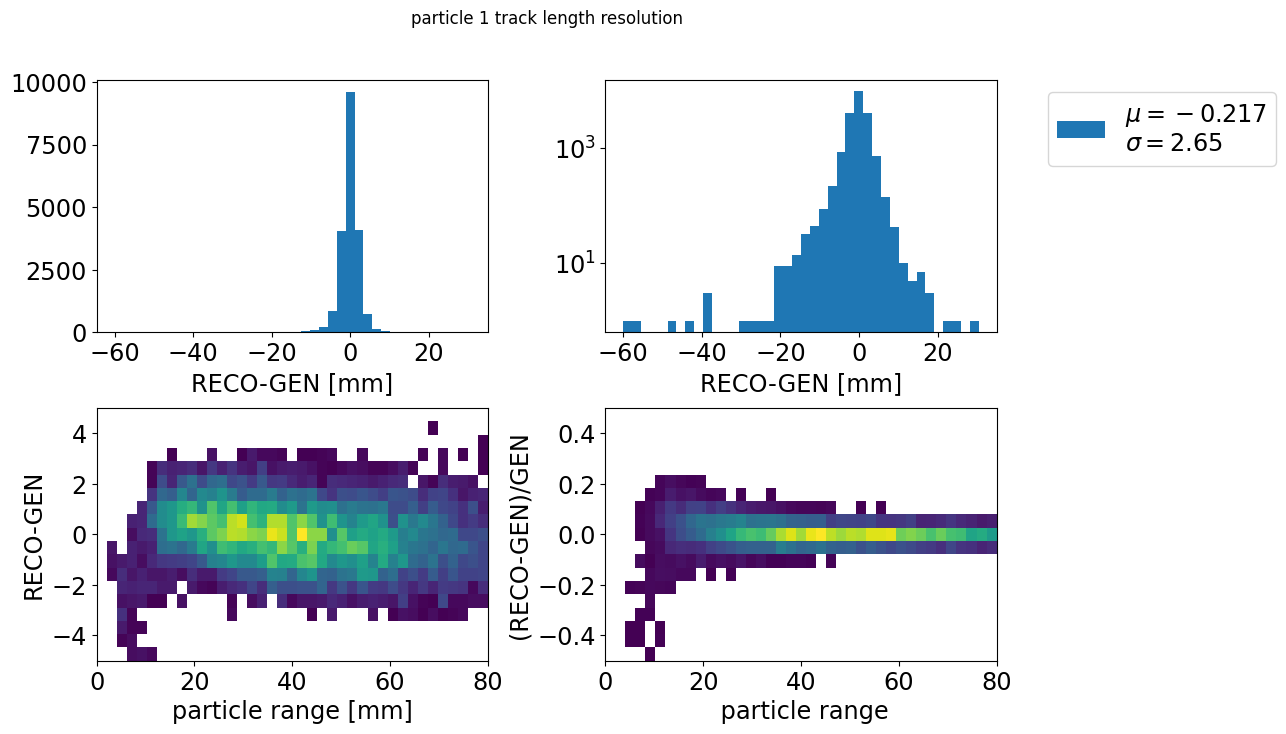

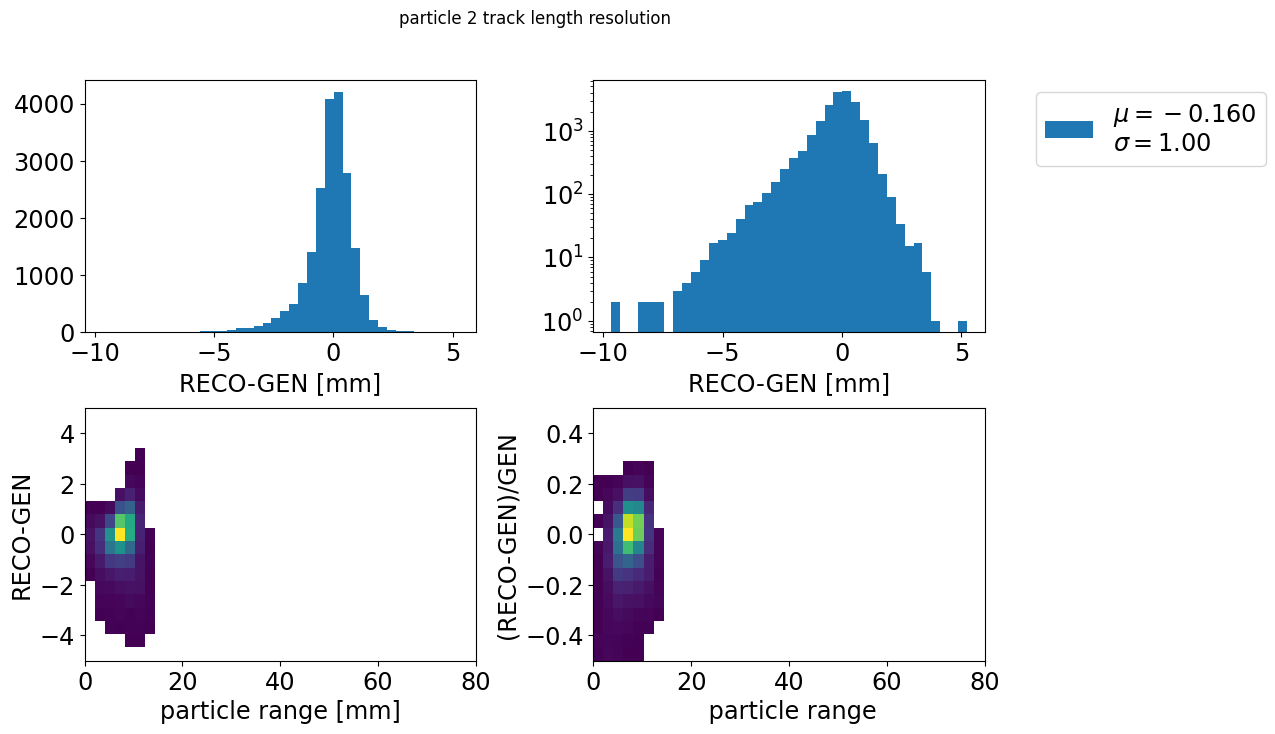

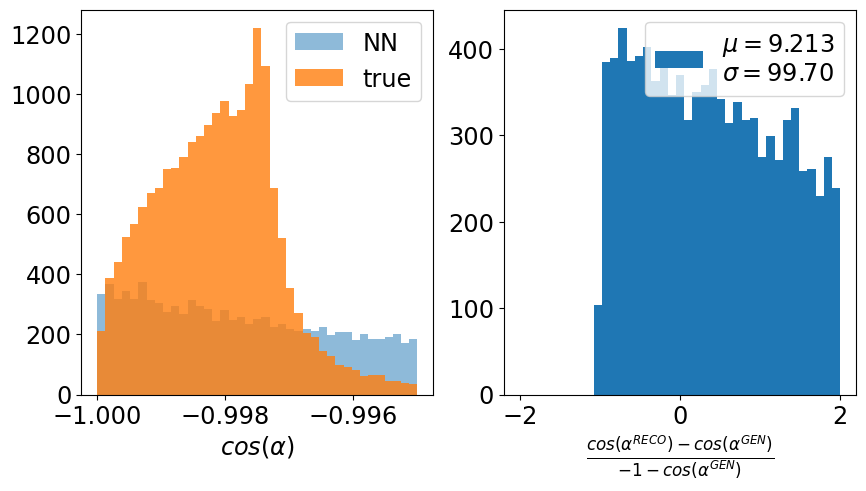

In [15]:
import plotting_functions as plf
importlib.reload(plf)

#plf.controlPlots(df)
plf.plotEndPointRes(df=df, edge="Start", partIdx=1)
plf.plotEndPointRes(df=df, edge="Stop", partIdx=1)

plf.plotEndPointRes(df=df, edge="Start", partIdx=2)
plf.plotEndPointRes(df=df, edge="Stop", partIdx=2)

plf.plotLengthPull(df, partIdx=1)
plf.plotLengthPull(df, partIdx=2)
plf.plotOpeningAngleCos(df)

       GEN_StartPosX  GEN_StartPosY  GEN_StartPosZ  GEN_StopPosX_Part1  \
count   11896.000000   11896.000000   11896.000000        11896.000000   
mean        4.786497       0.202460     -52.895710            3.465831   
std        55.636345       9.572412      16.193954           64.936478   
min       -99.992844     -19.960903     -66.383377         -232.164764   
25%       -41.867299      -7.359752     -63.213820          -45.024638   
50%         6.856980       0.287762     -60.309460            4.701855   
75%        52.317142       7.879149     -47.439038           52.667109   
max        99.948830      19.903889      46.866379          203.588028   

       GEN_StopPosY_Part1  GEN_StopPosZ_Part1  GEN_StopPosX_Part2  \
count        11896.000000        11896.000000        11896.000000   
mean             0.401585          -51.174465            4.331966   
std             30.487566           21.390627           55.830482   
min           -141.568527         -117.088524         -10

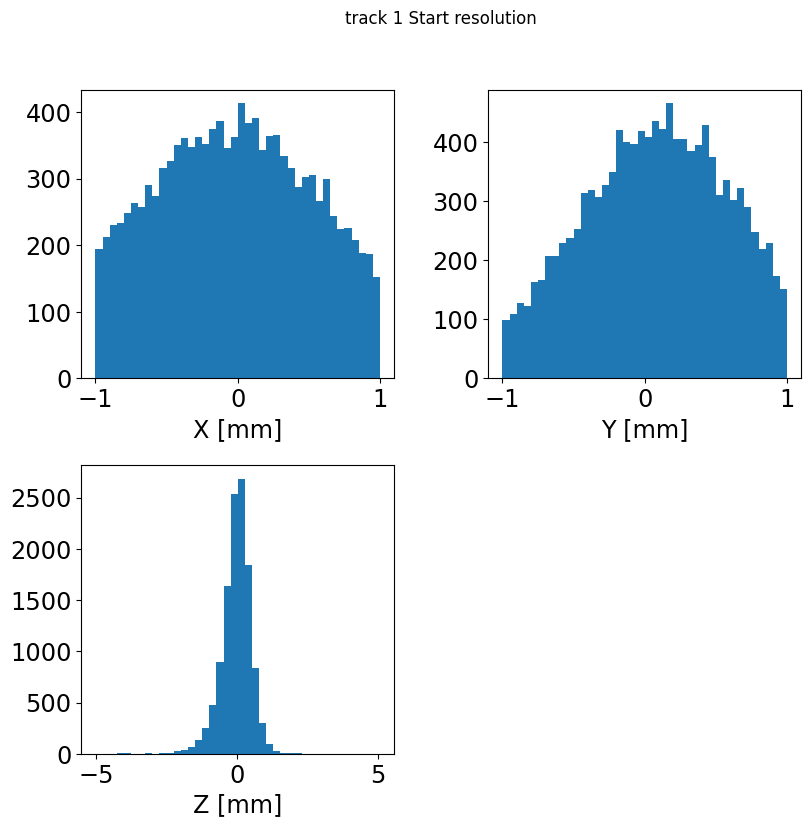

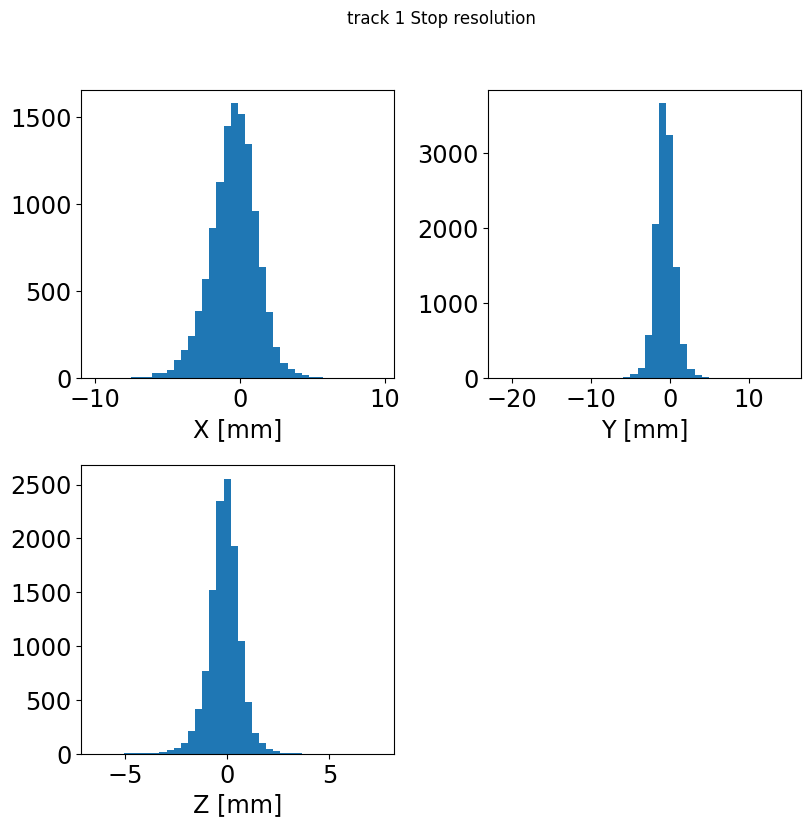

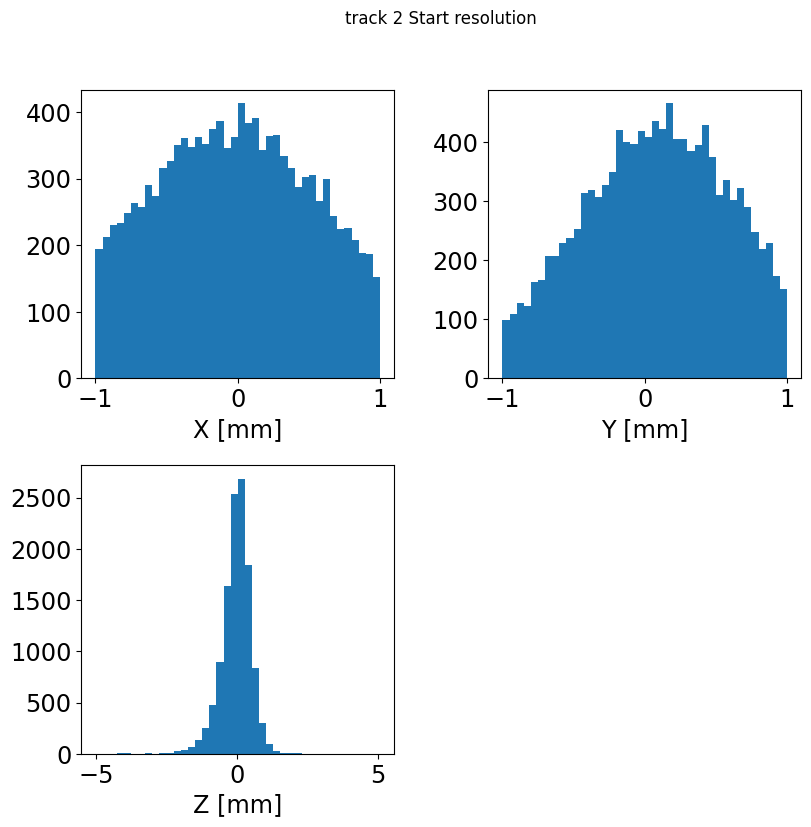

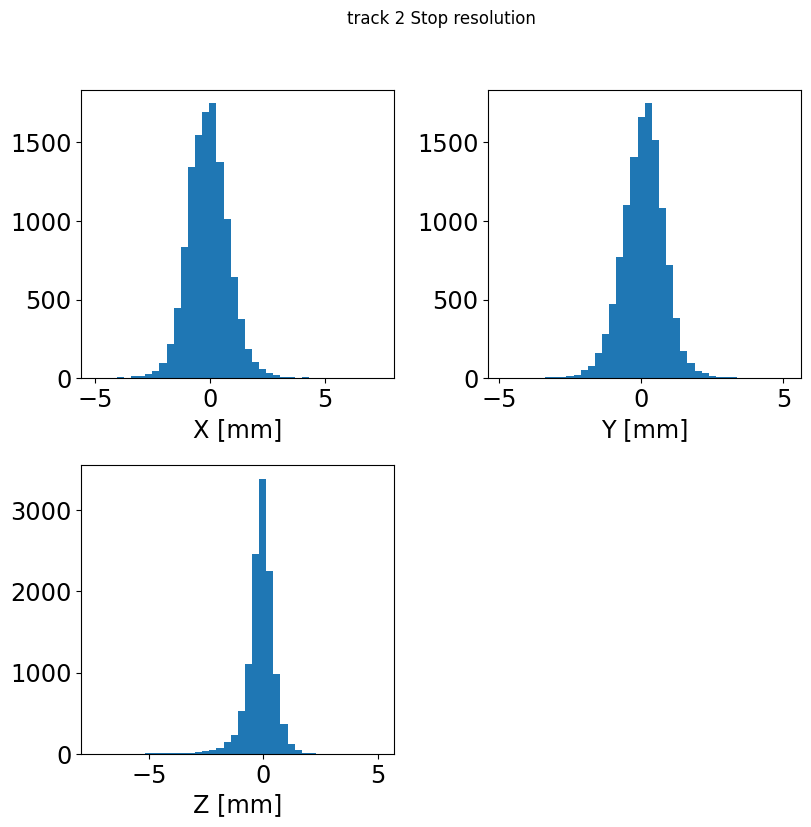

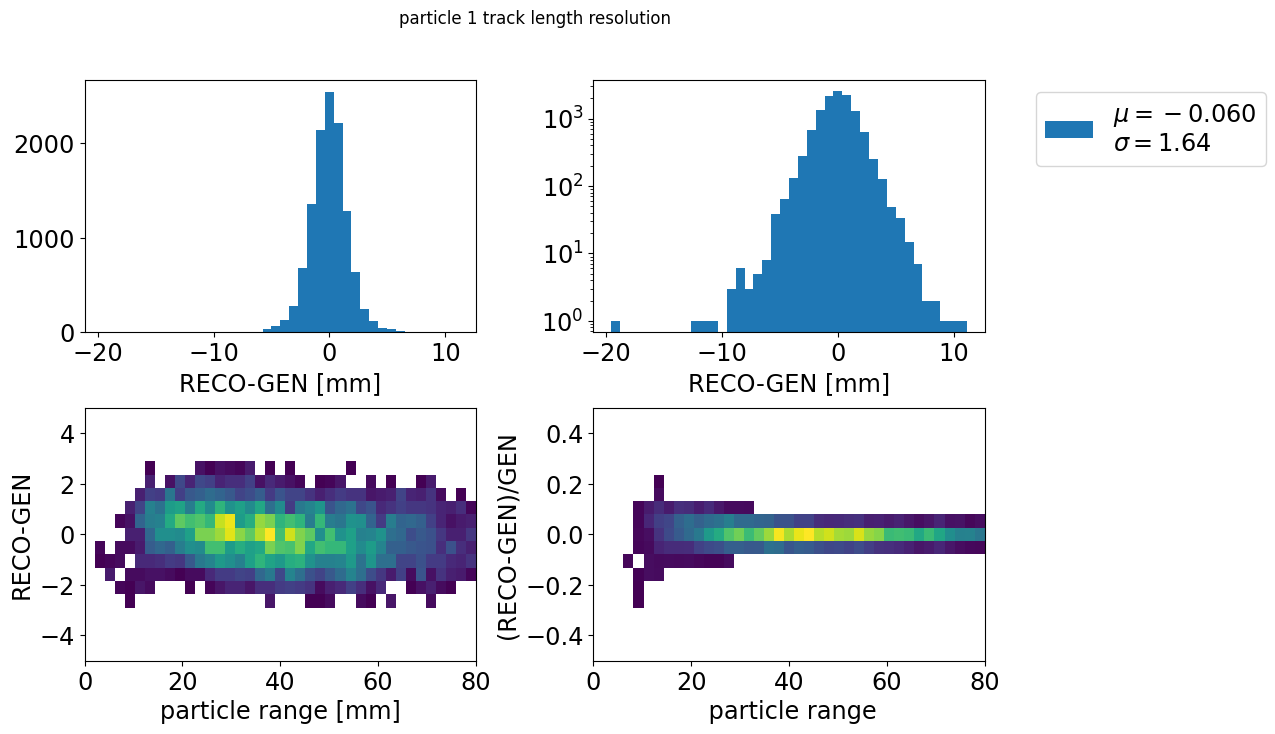

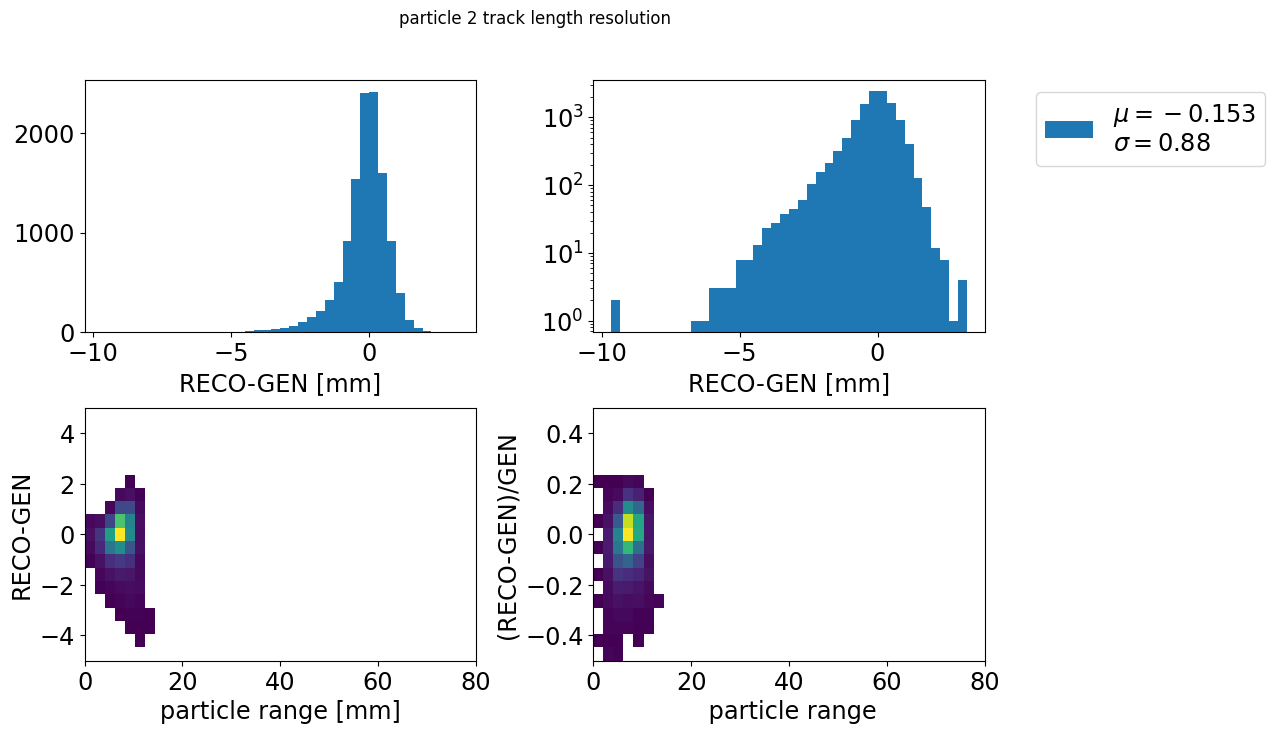

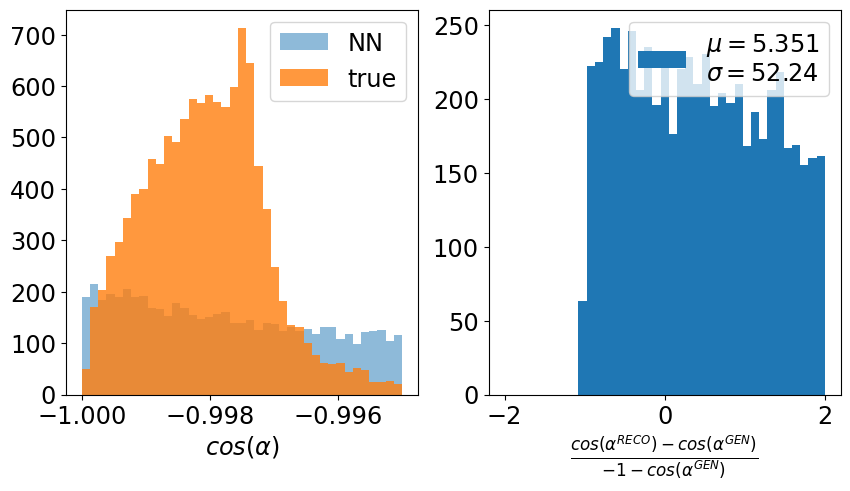

In [16]:
mask = np.abs(df["GEN_StartPosX"] - df["RECO_StartPosX"])<1
df_filtered = df[mask]

mask = np.abs(df_filtered["GEN_StartPosY"] - df_filtered["RECO_StartPosY"])<1
df_filtered = df_filtered[mask]

mask = np.abs(df_filtered["GEN_StopPosX_Part1"] - df_filtered["RECO_StopPosX_Part1"])<10
df_filtered = df_filtered[mask]

print(df_filtered.describe())

plf.plotEndPointRes(df=df_filtered, edge="Start", partIdx=1)
plf.plotEndPointRes(df=df_filtered, edge="Stop", partIdx=1)

plf.plotEndPointRes(df=df_filtered, edge="Start", partIdx=2)
plf.plotEndPointRes(df=df_filtered, edge="Stop", partIdx=2)

plf.plotLengthPull(df_filtered, partIdx=1)
plf.plotLengthPull(df_filtered, partIdx=2)
plf.plotOpeningAngleCos(df_filtered)

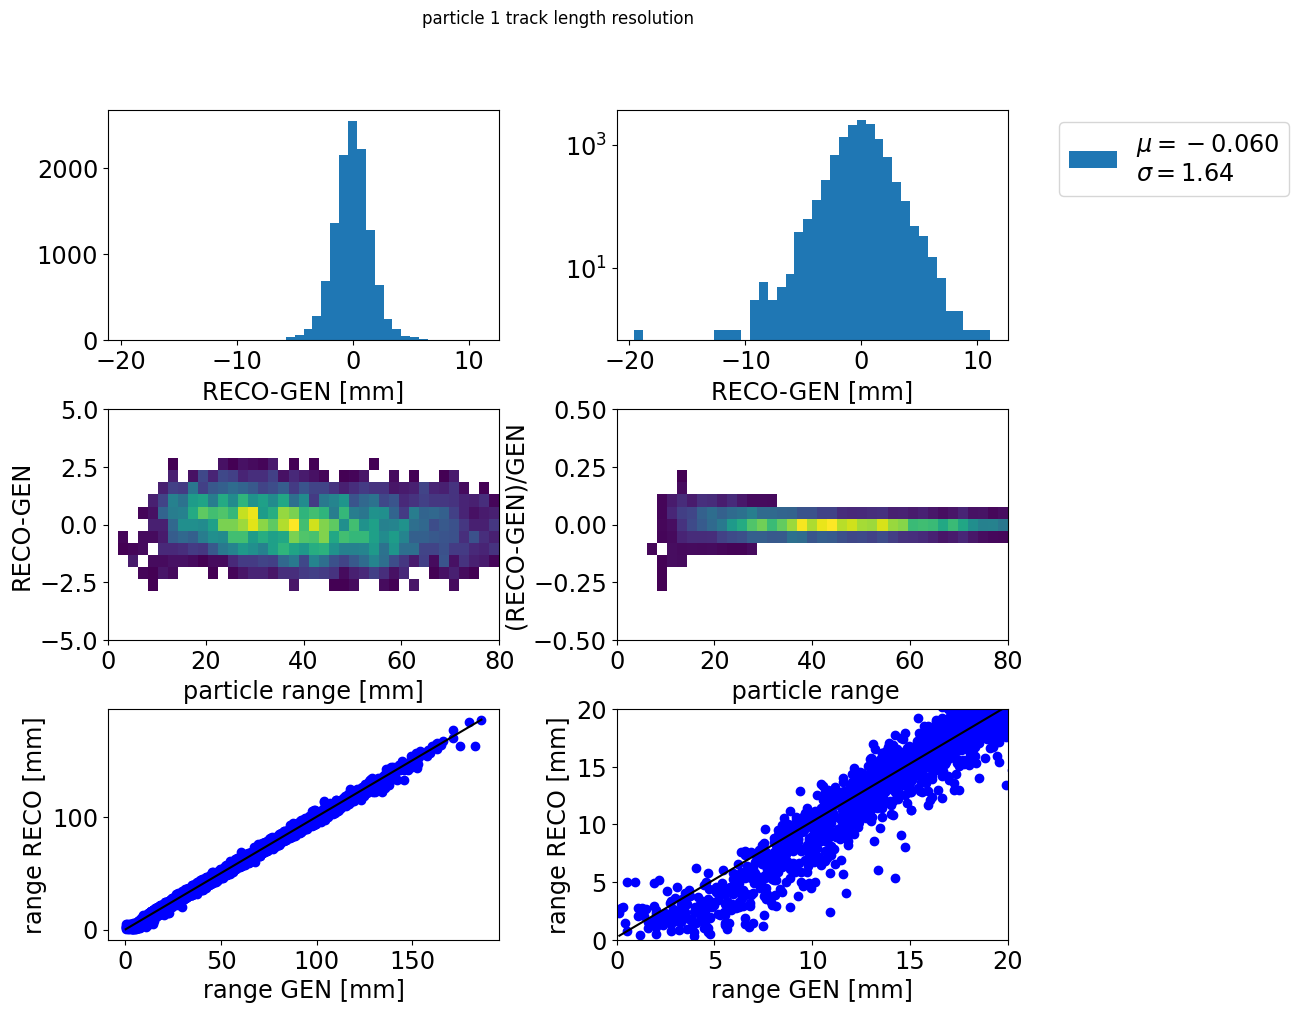

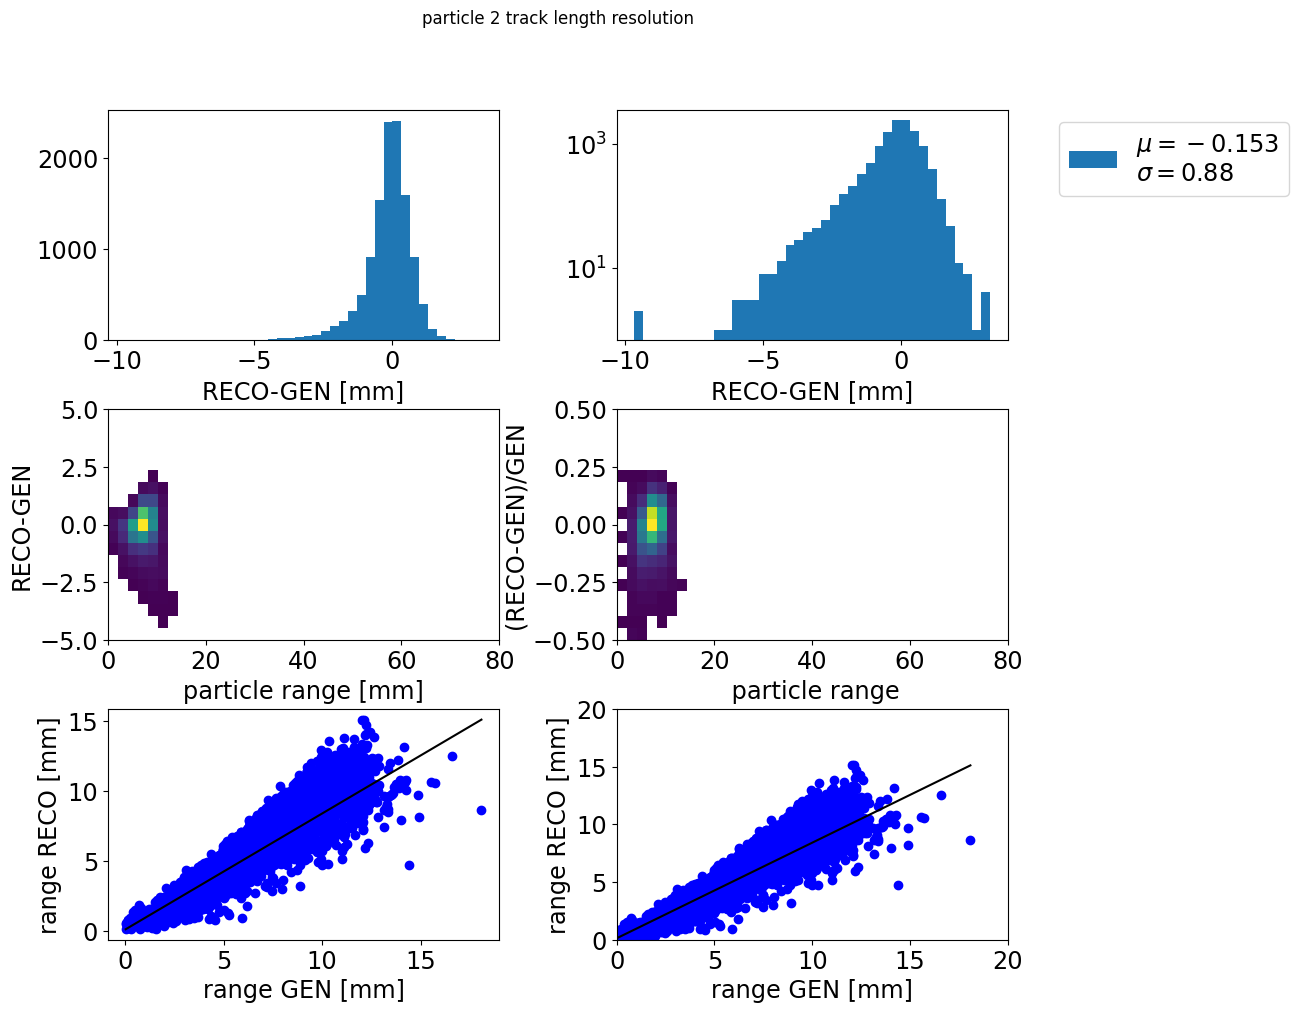

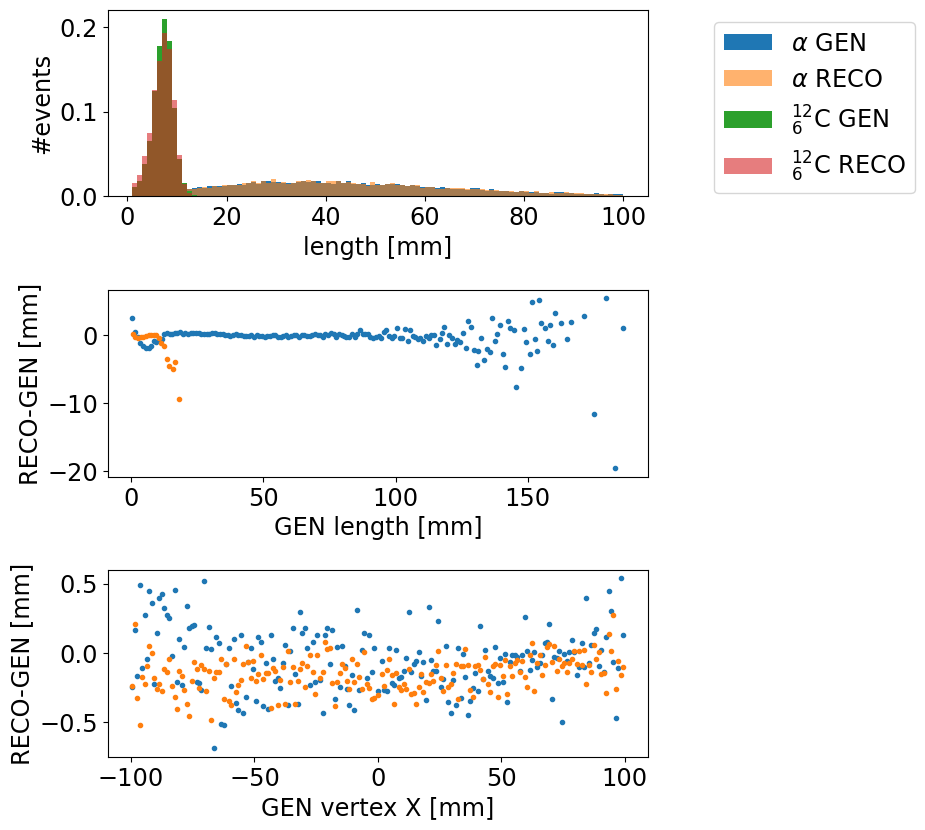

In [33]:
import plotting_functions as plf
importlib.reload(plf)

plf.plotLengthPull(df_filtered, partIdx=1)
plf.plotLengthPull(df_filtered, partIdx=2)
plf.plotLengthPullEvolution(df_filtered)
#plf.plotOpeningAngleCos(df_filtered)